In [2]:
import scipy
import librosa as lb
from scipy.signal import hamming
from matplotlib import pyplot as plt
from librosa import filters
from librosa import display
import librosa.display
from scipy.fftpack import fft
from numpy.lib.stride_tricks import as_strided
import numpy as np 

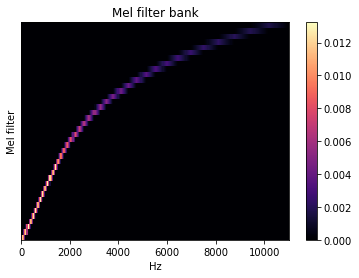

In [3]:
audioIn, fs=lb.load('/content/audio.wav', sr=None)                    
N_fft = 512
N_mel = 40
Mel_filterbank = filters.mel(sr=fs,n_fft=N_fft,n_mels=N_mel)
display.specshow(Mel_filterbank,x_axis='linear')                        
plt.title('Mel filter bank')
plt.ylabel('Mel filter');
plt.colorbar()
plt.show()

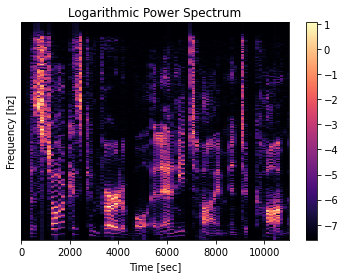

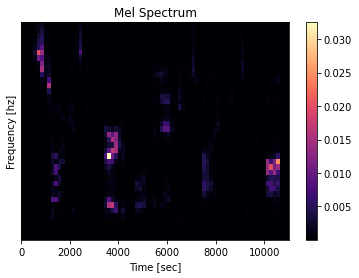

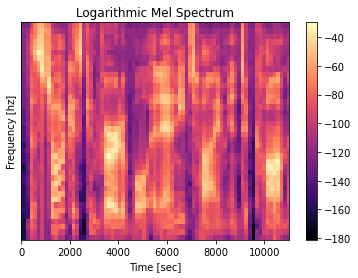

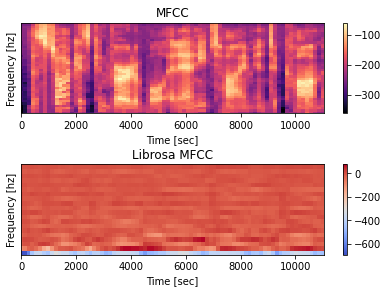

In [8]:
# (a) Pre-emphasis the audio signal
pre_emphasis=0.97
s,fs  = lb.load('/content/audio.wav',sr=None)
s = np.append(s[0], s[1:] - pre_emphasis * s[:-1])

window_length=int(64*0.001*fs)
n_fft = window_length
n_fft=N_fft
hop_size = window_length//2
win_funct = hamming(window_length,sym=False)
window_analysis = np.sqrt(win_funct)
    
# framing input signal with 50 % overlap.    
n_frames=int((len(s)-window_length)/hop_size)+1
y_frames=as_strided(s,(window_length,n_frames),(s.itemsize,hop_size*s.itemsize))

# initializing spectrograms
power_spec = np.zeros((N_fft//2+1,n_frames))
mel_spec = np.zeros((40,n_frames))
log_mel_spec = np.zeros((40,n_frames))
MFCC = np.zeros((40,n_frames))
    
# (b) STFT loop
for i in np.arange(n_frames):
    a=y_frames[:,i]
#   1   Window each frame (using hamming window) Hint: ​signal.hamming
    window_frame=a*window_analysis

#   2   Calculate the fft
    spectrum=fft(window_frame,N_fft)

#   3   Collect the power spectrum 
    spectrum=abs(spectrum[:N_fft//2+1].reshape((257,1)))
    pow_spectrum=np.power(spectrum,2)
        
#   4   Multiply it with mel filterbank you created in Question 1
    mel_spectrum = np.dot(Mel_filterbank,pow_spectrum)
        
#   5   Take log operation (you will get logarithmic mel spectrum) Hint: ​20 * np.log10
    logarithmic_mel_spectrum = 20 * np.log10(mel_spectrum)

#   6   DCT to get MFCC
    DCT=scipy.fftpack.dct(logarithmic_mel_spectrum, type=2, n=None, axis=-1, norm=None, overwrite_x=False)[:40]
        
    power_spec[:,i]   =  pow_spectrum.flatten() 
    mel_spec[:,i]       =  mel_spectrum.flatten()
    log_mel_spec[:,i]=logarithmic_mel_spectrum.flatten()
    MFCC[:,i]=DCT.flatten()

# (c) Plot logarithmic power spectrums, mel spectrums, logarithmic mel spectrums, MFCC.

plt.figure()
display.specshow(np.log(np.abs(power_spec)+0.0005),x_axis='linear') 
plt.ylabel("Frequency [hz]")
plt.xlabel("Time [sec]")
plt.title("Logarithmic Power Spectrum")
plt.colorbar()

plt.figure()
display.specshow(mel_spec,x_axis='linear') 
plt.ylabel("Frequency [hz]")
plt.xlabel("Time [sec]")
plt.title("Mel Spectrum")
plt.colorbar()

plt.figure()
display.specshow(log_mel_spec,x_axis='linear')
plt.ylabel("Frequency [hz]")
plt.xlabel("Time [sec]") 
plt.title("Logarithmic Mel Spectrum")
plt.colorbar()

# (d) Implement MFCC using librosa and compare with yours

plt.figure()
plt.subplot(2,1,1)
display.specshow(MFCC,x_axis='linear') 
plt.ylabel("Frequency [hz]")
plt.xlabel("Time [sec]")
plt.title("MFCC")
plt.colorbar()

plt.tight_layout(pad = 2.0)

plt.subplot(2,1,2)
librosa_mfcc= librosa.feature.mfcc(s, sr=fs)
display.specshow(librosa_mfcc,x_axis='linear') 
plt.ylabel("Frequency [hz]")
plt.xlabel("Time [sec]")
plt.title("Librosa MFCC")
plt.colorbar()

plt.show()

